# Exercícios: Combinação linear de variáveis aleatórias e propriedades de esperança e variância
___

## Aula 17 - Exercícios

<div id="indice"></div>

## Índice

- [Exercício 1](#ex1)
- [Exercício 2](#ex2)
- [Exercício 3](#ex3)
- [Exercício 4](#ex4)
- [Exercício 5](#ex5)
- [Exercício 6](#ex6)
- [Respostas](#respostas)
    - [Exercício 1a](#resposta1a)
    - [Exercício 1b](#resposta1b)
    - [Exercício 2a](#resposta2a)
    - [Exercício 2b](#resposta2b)
    - [Exercício 3](#resposta3)
    - [Exercício 4](#resposta4)
    - [Exercício 5](#resposta5)
______

In [2]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

<div id="ex1"></div>

### EXERCÍCIO 1

Sejam $X \sim Exp(\mu=10)$ e $Y \sim Exp(\mu=20)$, duas variáveis aleatórias independentes.  

Vamos definir a variável aleatória $Z$ como $Z = 2X + 3Y$

Responda:

<div id="ex1a"></div>

**a.** Qual deve ser $E(Z)$ e $Var(Z)$? Responda usando a teoria.

<a href="#resposta1a">Respostas</a>

In [16]:
lambda_X = 1/10
lambda_Y = 1/20
print(2*10 + 3*20)
print((2**2)*(1/lambda_X**2) + (3**2)*(1/lambda_Y**2))

80
3999.9999999999995


<div id="ex1b"></div>

**b.** Verifique, através de simulação, o resultado anterior.  Não se esqueça de apresentar os valores de $E(Z)$ e $Var(Z)$ obtidos a partir dos dados e de plotar o histograma.

<a href="#resposta1b">Respostas</a>

82.21485391683349
4349.080269190444


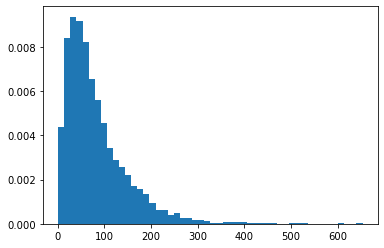

In [17]:
n = 5000
X = stats.expon.rvs(scale=10, size=n)
Y = stats.expon.rvs(scale=20, size=n)
Z = 2*X + 3*Y

plt.hist(Z, bins=50, density=True)
plt.plot()

df = pd.DataFrame()
df['Z'] = Z
print(df.Z.mean())
print(df.Z.var())

___
<div id="ex2"></div>

### EXERCÍCIO 2

Dadas duas variáveis aleatórias normais $X$ e $Y$, não correlacionadas entre si, com médias de 100 e 150, e desvios padrão de 30 e 40, respectivamente:

<div id="ex2a"></div>

**a** Quais seriam $E(X + Y)$ e $V(X + Y)$ conforme a teoria? Que formato teria a distribuição?

<a href="#resposta2a">Respostas</a>

In [19]:
print(100 + 150)
print(30**2 + 40**2)

250
2500


<div id="ex2b"></div>

**b** Simule este resultado.

<a href="#resposta2b">Respostas</a>

250.17926243254706
2495.904514872975


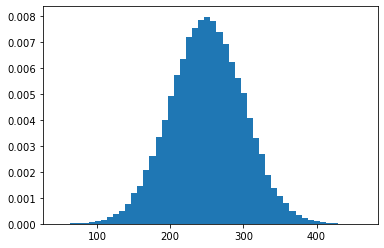

In [23]:
n = 50000
X = stats.norm.rvs(loc=100, scale=30, size=n)
Y = stats.norm.rvs(loc= 150, scale=40, size=n)
Z = X + Y

plt.hist(Z, bins=50, density=True)
plt.plot()

df = pd.DataFrame()
df['Z'] = Z
print(df.Z.mean())
print(df.Z.var())

<div id="ex3"></div>

### EXERCÍCIO 3

Os arquivos `var1.csv` e `var2.csv` contém amostras **correlacionadas** de duas variáveis aleatórias **não independentes** $X$ e $Y$.

Dados:

$\mu_X = 20$

$\mu_Y = 25$

$\sigma_X^2 = 25$

$\sigma_Y^2 = 16$

$Cov(X,Y) = 10$


Faça:
* Calcule a média e o desvio padrão de Z = X + Y usando a teoria
* verifique nos dados se o resultado é coerente

<a href="#resposta3">Respostas</a>

In [37]:
print(20 + 25)
print(25 + 16 + 2*10)

df_X = pd.read_csv("var1.csv", names=["X"])
df_Y = pd.read_csv("var2.csv", names=["Y"])

df_Z = pd.DataFrame()
df_Z["Z"] = df_X.X + df_Y.Y

print(df_Z.Z.mean())
print(df_Z.Z.var())


45
61
45.051758138707584
58.97928363410342


___
<div id="ex4"></div>

## Exercício 4

Um processo industrial pode ser executado em duas etapas independentes. O tempo gasto em cada etapa segue uma distribuição com média de 5 horas e desvio-padrão de 10 horas. 
Um engenheiro resolveu modificar o processo de produção fazendo com que seja executado numa única fase, cujo tempo de execução é o dobro da primeira etapa do processo atual.
Vale a pena adotar o processo proposto pelo engenheiro?

<a href="#resposta4">Respostas</a>

In [40]:
mu = 5
var = 100
# 2 processos independentes
print(mu + mu)
print(var + var)

# 1 processo
print(2*mu)
print(2**2*var)

10
200
10
400


___

<div id="ex5"></div>

### EXERCÍCIO 5 

Uma pessoa irá comprar uma camisa e uma calça. Os dois produtos serão adquiridos numa mesma loja. O preço da camisa segue uma distribuição aproximadamente normal de média 45,00 reais e desvio-padrão 3,00 reais. O preço da calça segue uma distribuição aproximadamente normal de média 60,00 reais e desvio-padrão 5,00 reais. Sabe-se ainda que a correlação entre os preços da camisa e da calça é da ordem de 0,25 e que o gasto com a compra de uma camisa e uma calça seja modelado por uma distribuição normal.

a) Uma pessoa possui apenas 95,00 reais para comprar a camisa e a calça, indo a um único estabelecimento escolhido ao acaso, qual é a probabilidade de conseguir comprar os dois produtos? Considere que o gasto total com a compra de uma calça e uma camisa também segue uma distribuição aproximadamente normal.

b) Indo a um único estabelecimento, qual a probabilidade de se pagar mais caro na camisa do que na calça?

<a href="#resposta5">Respostas</a>

In [52]:
mu_camisa = 45
sigma_camisa = 3
mu_calca = 60
sigma_calca = 5
corr = 0.25

# A
mu_compra = mu_camisa + mu_calca
sigma_compra = (sigma_camisa**2 + sigma_calca**2 + 2*(corr*sigma_calca*sigma_camisa))**0.5

print(stats.norm.cdf(95, loc=mu_compra, scale=sigma_compra))

# B
mu_compra = mu_camisa - mu_calca
sigma_compra = (sigma_camisa**2 + sigma_calca**2 - 2*(corr*sigma_calca*sigma_camisa))**0.5

print(1 - stats.norm.cdf(0, loc=mu_compra, scale=sigma_compra))

0.0602951032363964
0.001784963611592305


___

<div id="ex6"></div>

### EXERCÍCIO 6

O preço de compra, em reais, de cada unidade da matéria-prima M1 não é fixo (único), pois pode variar de região para região brasileira. Neste caso, assuma que o preço de M1 pode ser modelado por uma distribuição normal com média 15 reais e desvio padrão 3 reais. 

a) Qual é o menor valor cobrado pela matéria-prima M1 referente aos 39% dos locais mais careiros?

b) Um determinado produto, que será lançado no mercado, é composto por três unidades de mesmo valor da matéria-prima M1. Ainda, na fabricação desse produto, há um custo fixo de 30 reais por produto produzido. O valor comercializado de cada produto será definido para que se tenha um lucro de 35% sobre o valor da etiqueta. Encontre a esperança, variância e distribuição do valor comercializado de cada produto.


In [13]:
# A
print(stats.norm.ppf(0.61, loc=15, scale=3))
# B
print((3*15 + 30)*(1/0.65))


15.837957103342362
115.38461538461537
124.6153846153846


<div id="respostas"></div>

---
# Respostas

<a href="#indice">Voltar para o índice</a>

<div id="resposta1a"></div>

### Exercício 1a

<a href="#ex1a">Voltar para o Exercício 1a</a>

$E(Z)=80$ e $Var(Z)=4000$

<div id="resposta1b"></div>

### Exercício 1b

<a href="#ex1b">Voltar para o Exercício 1b</a>

É esperado um histograma semelhante a esse:

![](./ex1b.png)

<div id="resposta2a"></div>

### Exercício 2a

<a href="#ex2a">Voltar para o Exercício 2a</a>

$E(X+Y)=250$, $Var(X+Y)=2500$. Para o formato, considerar a "Propriedade reprodutiva da normal".

<div id="resposta2b"></div>

### Exercício 2b

<a href="#ex2b">Voltar para o Exercício 2b</a>

É esperado um histograma semelhante a esse:

![](./ex2b.png)

<div id="resposta3"></div>

### Exercício 3

<a href="#ex3">Voltar para o Exercício 3</a>

$E(Z) = 45$

$V(Z) = 61$

#### A partir dos dados

Médias: m(X) = 20.121265998974028, m(Y) = 24.93049213973364, m(Z) = 45.051758138707584

Variâncias: v(X) = 22.19198031318174, v(Y) = 16.902487155078422, v(Z) = 58.97928363410342

Covariância: cov(X,Y) = 9.94240808292163

<div id="resposta4"></div>

### Exercício 4

<a href="#ex4">Voltar para o Exercício 4</a>

Atual: E(T) = 10 e DP(T) = 14.142135623730951

Novo: E(T) = 10 e DP(T) = 20

<div id="resposta5"></div>

### Exercício 5

<a href="#ex5">Voltar para o Exercício 5</a>

a) 0.0602951032363964 (dica: $Cov(X,Y)=DP(X)\times DP(Y)\times Corr(X,Y)$)

b) 0.001784963611592305 (dica: $X-Y$ inverte o sinal da correlação de $X$ e $Y$)

<div id="resposta6"></div>

### Exercício 6

<a href="#ex6">Voltar para o Exercício 6</a>

a) 15.837957103342362

b) Esperança:  115.38461538461539, Variância:  191.7159763313609